In [2]:
def plot_all_density_maps(tensor_path, image_shape=(100, 100), normalize=True):
    """
    Loads a .pt file containing a dict with 'D' (image data) and 'N_list' (labels),
    computes and plots a density map for each unique N in N_list.
    Also plots a histogram of the number of samples per class.

    Args:
        tensor_path (str): Path to the .pt file.
        image_shape (tuple): Shape of individual images (e.g. (100, 100)).
        normalize (bool): Whether to normalize the density map per group.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Load dictionary
    data_dict = np.load(tensor_path)
    data = data_dict['D']
    n_list = data_dict['N_list']

    # Get unique values and counts
    unique_n, counts = np.unique(n_list, return_counts=True)

    # --- Histogram Plot ---
    plt.figure(figsize=(8, 4))
    plt.bar(unique_n, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Class (N)')
    plt.ylabel('Number of Samples')
    plt.title('Histogram of Sample Counts per Class')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- Density Maps ---
    num_groups = len(unique_n)
    cols = min(5, num_groups)
    rows = (num_groups + cols - 1) // cols
    plt.figure(figsize=(cols * 4, rows * 4))

    for idx, n in enumerate(unique_n):
        # Filter images by N_list == n
        mask = n_list == n
        group_data = data[mask]

        # Skip if no data for this group
        if group_data.shape[0] == 0:
            continue

        # Compute density map
        density_map = group_data.sum(axis=0).reshape(image_shape)

        # Normalize
        if normalize:
            density_map -= density_map.min()
            if density_map.max() > 0:
                density_map /= density_map.max()

        # Plot
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(density_map, cmap='hot', interpolation='nearest')
        plt.title(f'N = {n} ({group_data.shape[0]} samples)')
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle("Density Maps by N (Circle Count)", fontsize=16, y=1.02)
    plt.show()


Value(False)


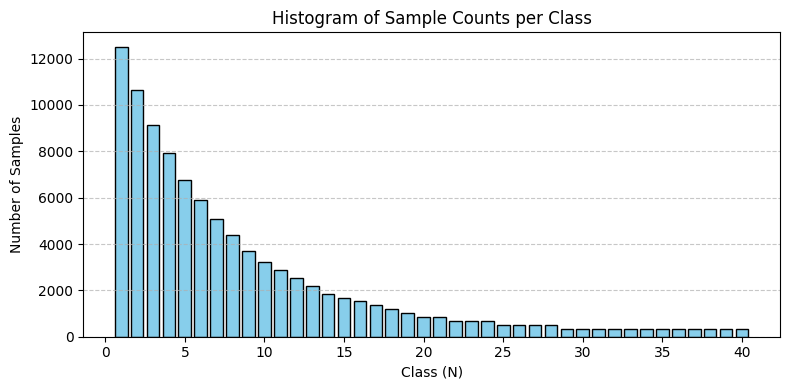

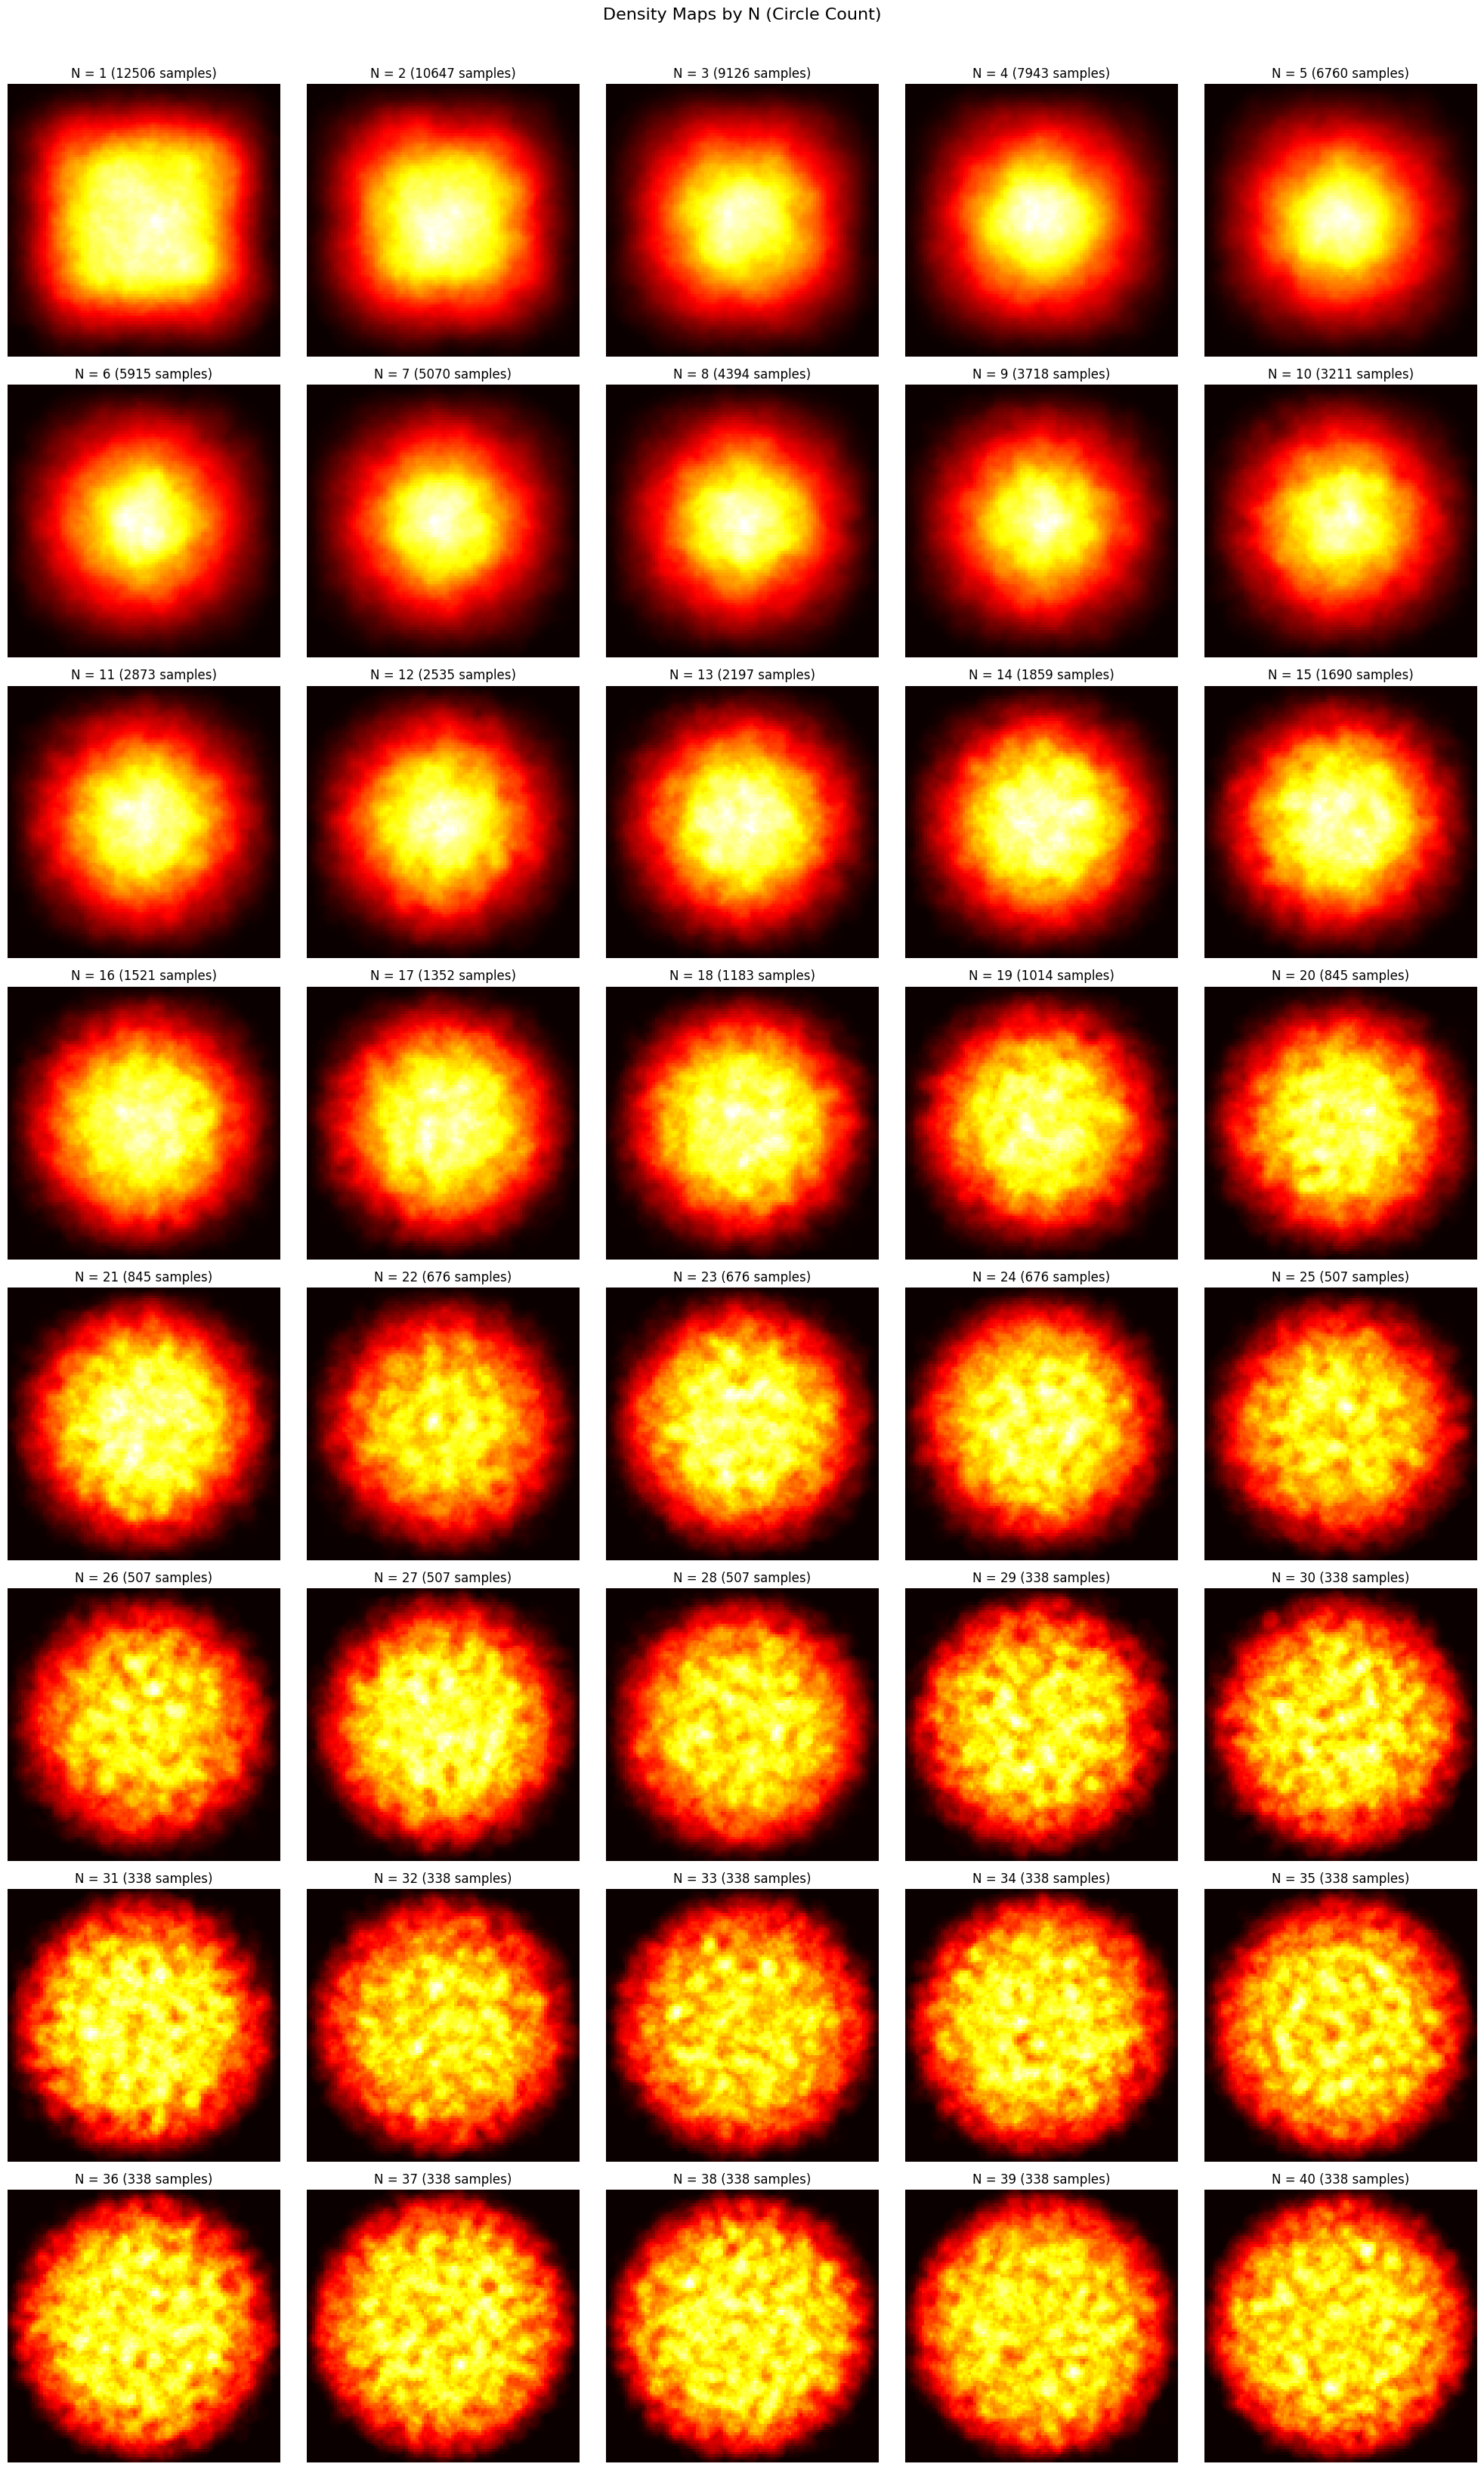

In [ ]:
data_path = "/home/student/Desktop/Groundeep/training_tensors/uniform/NumStim_1to40_100x100_TR_zipfian.npz"
plot_all_density_maps(data_path)

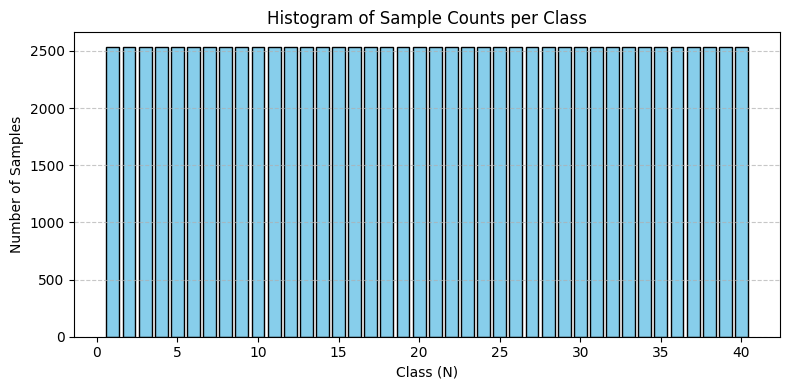

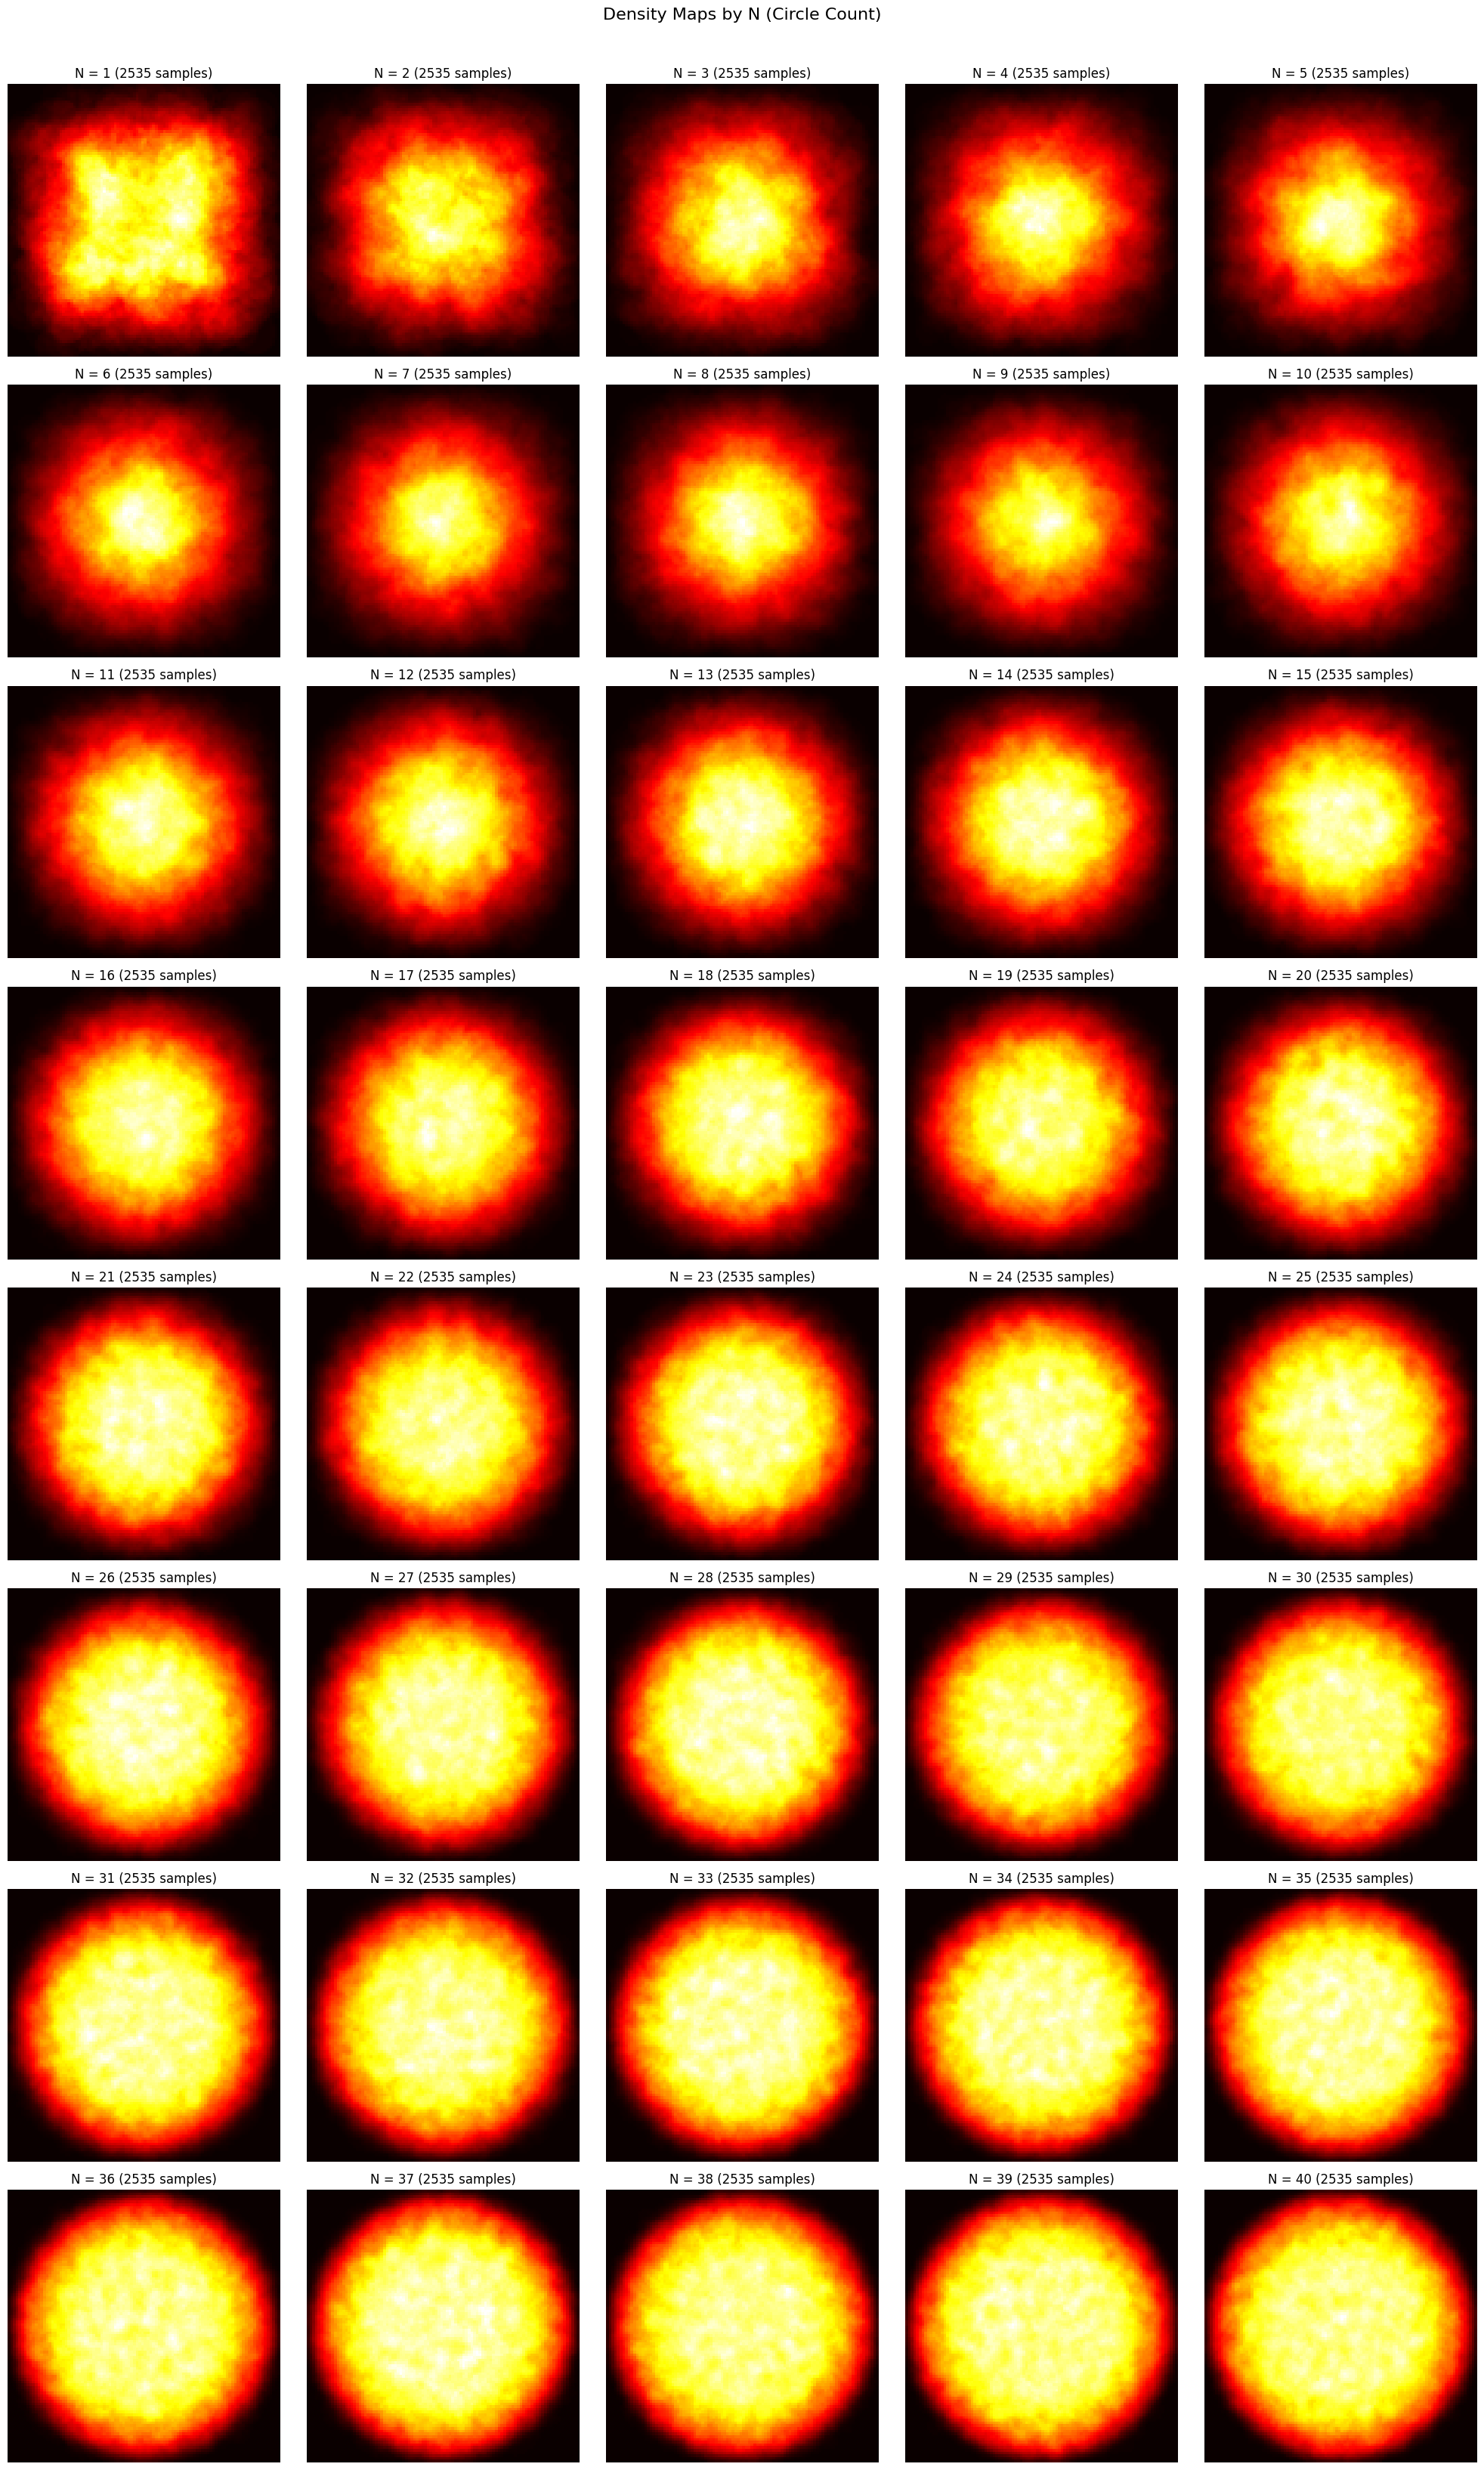

In [3]:
data_path = "/home/student/Desktop/Groundeep/training_tensors/uniform/NumStim_1to40_100x100_TR_uniform.npz"
plot_all_density_maps(data_path)

In [4]:
from scipy import io
import numpy as np

test_contents = io.loadmat("/home/student/Desktop/Groundeep/NumStim_7to28_100x100_TE.mat")
N_list_test = test_contents['N_list']

In [5]:
np.unique(N_list_test)

array([ 7.,  8.,  9., 10., 11., 12., 14., 16., 18., 20., 22., 25., 28.],
      dtype=float32)